<h1><u>Classification of digits with PCA preprocessing</u></h1>
<h3>April 2018</h3>


I Differentiate digit 2 from digit 7

- I select only digit 2, and digit 7 from ziptrain data set. 
- I project ziptrain onto two principal components (PCA)
- Make a scatterplot to confirm wheather or not only two principal components separates digit 2 from digit 7.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading digits images
os.chdir('/Users/talbotm/Documents/py_code')
os.getcwd()
train = np.loadtxt('data/ziptrain.csv')
test = np.loadtxt('data/ziptest.csv')

In [8]:
# Isolating 2's and 7's training set
train_2 = train[train[:,0] == 2 ]
train_7 = train[train[:,0] == 7]
train_2_7 = np.vstack([train_2, train_7])

In [9]:
#First col = the digit identity (2 here) and cols 1-256 are pixels strutured as a vector
pd.DataFrame(train_2_7).head(3)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.798,0.300,0.432,-0.799,...,-0.947,-0.524,0.307,0.390,0.852,0.751,0.990,0.567,-0.664,-1.0
1,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.638,0.222,0.706,1.000,...,-0.576,0.635,0.755,0.549,0.273,0.074,-0.083,-1.000,-1.000,-1.0
2,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [10]:
# First col tells us the digit's identity (7 here) and cols 1-256 are pixels that represent the number, 
# strutured as a vector
pd.DataFrame(train_2_7).tail(3)

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
1373,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-0.939,0.740,-0.337,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1374,7.0,-1.0,-1.0,-1.0,-0.752,0.189,0.073,-1.000,-1.000,-1.000,...,-0.952,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1375,7.0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.954,0.125,0.709,0.647,...,-0.491,0.866,-0.065,-1.000,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


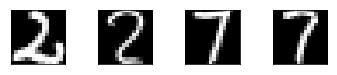

In [11]:
# This is what the data looks like
train_2_7[0,1:].reshape(16,16)
f,(ax1,ax2, ax3, ax4) = plt.subplots(1, 4,  figsize=(6,1))
axs = [ax1, ax2, ax3, ax4]
images = [0, 1, 800, 802]
for i in range(len(axs)):
    axs[i].imshow(train_2_7[images[i],1:].reshape(16,16),'gray')
    axs[i].get_xaxis().set_ticks([]); axs[i].get_yaxis().set_ticks([]);

We see that two principal components separates well digit 2 from digit 7


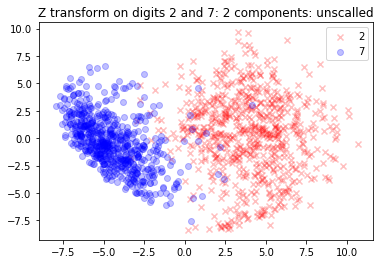

In [12]:
pca = PCA(n_components = 2)
pca.fit(train_2_7[:, 1:])
Z = pca.transform(train_2_7[:,1:])

def plot_2PCAs(Z, train_2_7, preprocess):
    plt.scatter(Z[:,0][ train_2_7[:,0] == 2 ], Z[:,1][ train_2_7[:,0] == 2 ], c='red', marker = 'x', alpha = 0.25);
    plt.scatter(Z[:,0][ train_2_7[:,0] == 7 ], Z[:,1][ train_2_7[:,0] == 7 ], c = 'blue', marker = 'o', alpha = 0.25);
    plt.legend([2,7])
    plt.title("Z transform on digits 2 and 7: 2 components: {}".format(preprocess), size =12);
    
plot_2PCAs(Z, train_2_7, 'unscalled')    
print("We see that two principal components separates well digit 2 from digit 7")

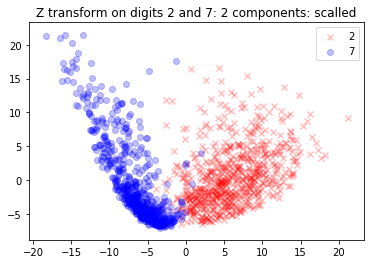

In [13]:
# Scalling data, then applying PCA

scaler = preprocessing.StandardScaler().fit(train[:, 1:])
train[:, 1:] = scaler.transform(train[:, 1:])  
test[:, 1:] = scaler.transform(test[:, 1:])  

train_2 = train[train[:,0] == 2]
train_7 = train[train[:,0] == 7]
train_2_7 = np.vstack([train_2, train_7])

pca = PCA(n_components = 2)
pca.fit(train_2_7[:, 1:])
Z = pca.transform(train_2_7[:,1:])

plot_2PCAs(Z, train_2_7, 'scalled')    

## Logistic regression
- I fit a logistic regression to separate digit 2 from digit 7 over the projected 2 principal components. Classes are differentiated using 0 and 1 (and not 2 or 7).
- I build the confusion matrix on ziptest and check how well the model works on the test data.


------------------ LR on test data w digit: 2 -------------------
Accuracy = 	0.9710
Precision = 	0.9747
Sensitivity = 	0.9747
Specificity = 	0.9660
F1-score bin = 	0.9747
AUC score = 	0.9964


          Predicted 0  Predicted 1
Actual 0          142            5
Actual 1            5          193

------------------ LR on test data w digit: 7 -------------------
Accuracy = 	0.9710
Precision = 	0.9660
Sensitivity = 	0.9660
Specificity = 	0.9747
F1-score bin = 	0.9660
AUC score = 	0.9964


          Predicted 0  Predicted 1
Actual 0          193            5
Actual 1            5          142


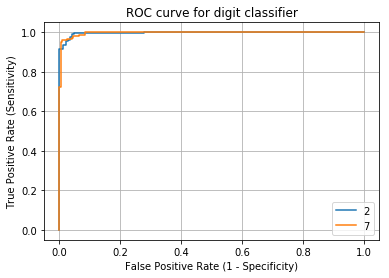

In [14]:
lr = LogisticRegression()

def classification_performance(y, y_pred, y_prob, print_ = True):
    confusion = metrics.confusion_matrix(y, y_pred)
    #print(y_pred.shape)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    if(print_ == True):
        print("Accuracy = \t{:1.4f}".format((TP + TN) / float(TP + TN + FP + FN)))
        print("Precision = \t{:1.4f}".format(TP / float(TP + FP)))
        print("Sensitivity = \t{:1.4f}".format(TP / float(TP + FN)))
        print("Specificity = \t{:1.4f}".format(TN / float(TN + FP)))
        print("F1-score bin = \t{:1.4f}".\
              format(metrics.f1_score(y, y_pred, average='binary')))
        print("AUC score = \t{:1.4f}".format(metrics.roc_auc_score(y, y_prob)))
        print("\n")
    fpr, tpr, thresholds = metrics.roc_curve(y, y_prob)
    plt.plot(fpr, tpr)
    plt.title('ROC curve for digit classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True);
    return pd.DataFrame(confusion, index=['Actual 0', 'Actual 1'], \
                        columns=['Predicted 0', 'Predicted 1'])

#preparing the train data and training on it
m = 2
pca = PCA(n_components = m)
pca.fit(train_2_7[:, 1:])
Z_train = pca.transform(train_2_7[:,1:])

test_2 = test[test[:,0] == 2]
test_7 = test[test[:,0] == 7]
test_2_7 = np.vstack([test_2, test_7])

# digit 2
is_2_train = (train_2_7[:,0] == 2).astype(int)
lr.fit(Z_train, is_2_train)
Z_test = pca.transform(test_2_7[:,1:])
is_2_test = (test_2_7[:,0] == 2).astype(int)
print("\n------------------ LR on test data w digit: 2 -------------------")
print(classification_performance(is_2_test, lr.predict(Z_test), lr.predict_proba(Z_test)[:,1]))

# digit 7
is_7_train = (train_2_7[:,0] == 7).astype(int)
lr.fit(Z_train, is_7_train)
Z_test = pca.transform(test_2_7[:,1:])
is_7_test = (test_2_7[:,0] == 7).astype(int)
print("\n------------------ LR on test data w digit: 7 -------------------")
print(classification_performance(is_7_test, lr.predict(Z_test), lr.predict_proba(Z_test)[:,1]))
plt.legend([2,7]);

<ul><li>The model works well on the test data. </li>
<li>I get 11 misclassified digits out of 345, about 3% are misclassified.<ul><li>Sensitivity and specificity are at 97% and 96%, respetively</li></ul> </li>
<li>The AUC score is 99.6%</li>
<li><b>Conclusion</b>: the model can distiguish well a 2 from a 7 and a 7 from a 2</li>


# Multiple principal components
- I project train data onto "m = 2, 3, ..." principal components.
- I choose an "m" so that the classification of digit 2 and 7 is the most precise on ziptest.

Highest accuracy of 0.991304347826087 is reached the first time with 33 components


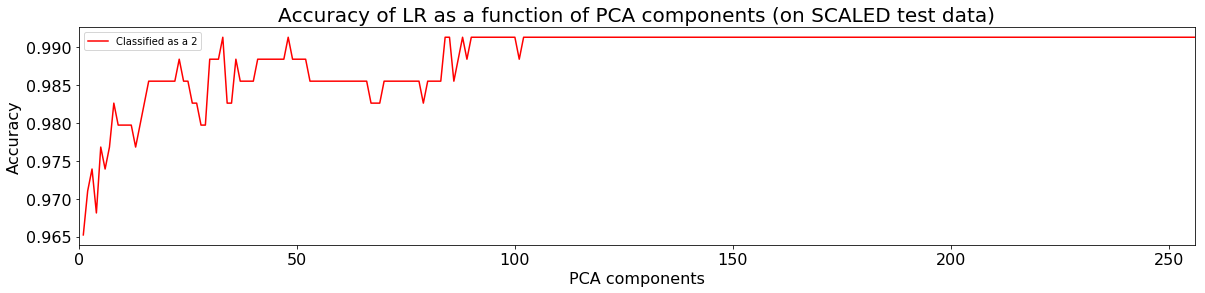

In [15]:
def accuracy_metric(y, y_pred):
    confusion = metrics.confusion_matrix(y, y_pred)
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    return (TP + TN) / float(TP + TN + FP + FN)

is_2_train = (train_2_7[:,0] == 2).astype(int)
is_2_test = (test_2_7[:,0] == 2).astype(int)
is_7_test = (test_2_7[:,0] == 7).astype(int)

lr = LogisticRegression()

accuracy_2 = [] 
score_2 = []
components = list(range(1,train[0,:].shape[0]))
for m in components:
    pca = PCA(n_components = m)
    pca.fit(train_2_7[:, 1:])
    Z_train = pca.transform(train_2_7[:,1:])
    lr.fit(Z_train, is_2_train)
    Z_test = pca.transform(test_2_7[:,1:])
    #accuracy.append(accuracy_metric(is_7_test, lr.predict(Z_test)))
    accuracy_2.append(accuracy_metric(is_2_test, lr.predict(Z_test)))
    
plt.subplots(figsize=(20,4))
plt.plot(components, accuracy_2, 'r')
plt.title('Accuracy of LR as a function of PCA components (on SCALED test data)',size=20)
plt.xlabel('PCA components',size=16)
plt.ylabel('Accuracy',size=16)
plt.xlim(0,256)
plt.tick_params(labelsize=16)
plt.legend(['Classified as a 2'])
print('Highest accuracy of {} is reached the first time with {} components'\
      .format(np.max(accuracy_2), np.where(accuracy_2 == np.max(accuracy_2))[0][0]+1))


<ul>
    <li>As shown in the plot above, accuracy on test data is the highest when <i>m</i> reaches 47 (99.1%) </li>
<li>With <i>m</i> = The 47, only 4 digits are incorrectly classified (<i>m</i> = 2 had 11)</li>
<li>The graph below shows the proportion of variance explaine by the first 47 components</li>
<ul><li>Cummulative variance plots: 87.3% of variance is explained by the first 47 components (see graph below)</li></ul>
</ul>


------------------ LR on test data w digit: 2 -------------------
Accuracy = 	0.9913
Precision = 	0.9899
Sensitivity = 	0.9949
Specificity = 	0.9864
F1-score bin = 	0.9924
AUC score = 	0.9972


          Predicted 0  Predicted 1
Actual 0          145            2
Actual 1            1          197

------------------ LR on test data w digit: 7 -------------------
Accuracy = 	0.9913
Precision = 	0.9932
Sensitivity = 	0.9864
Specificity = 	0.9949
F1-score bin = 	0.9898
AUC score = 	0.9972


          Predicted 0  Predicted 1
Actual 0          197            1
Actual 1            2          145


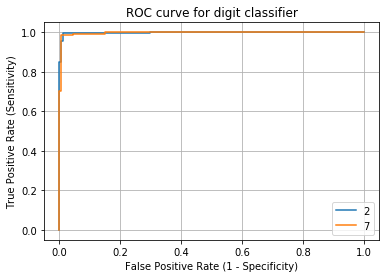

In [16]:
m = 47
pca = PCA(n_components = m)
pca.fit(train_2_7[:, 1:])
Z_train = pca.transform(train_2_7[:,1:])

# digit 2
is_2_train = (train_2_7[:,0] == 2).astype(int)
lr.fit(Z_train, is_2_train)
Z_test = pca.transform(test_2_7[:,1:])
is_2_test = (test_2_7[:,0] == 2).astype(int)
print("\n------------------ LR on test data w digit: 2 -------------------")
print(classification_performance(is_2_test, lr.predict(Z_test), lr.predict_proba(Z_test)[:,1]))

# digit 7
is_7_train = (train_2_7[:,0] == 7).astype(int)
lr.fit(Z_train, is_7_train)
Z_test = pca.transform(test_2_7[:,1:])
is_2_test = (test_2_7[:,0] == 7).astype(int)
print("\n------------------ LR on test data w digit: 7 -------------------")
print(classification_performance(is_7_test, lr.predict(Z_test), lr.predict_proba(Z_test)[:,1]))
plt.legend([2,7]);

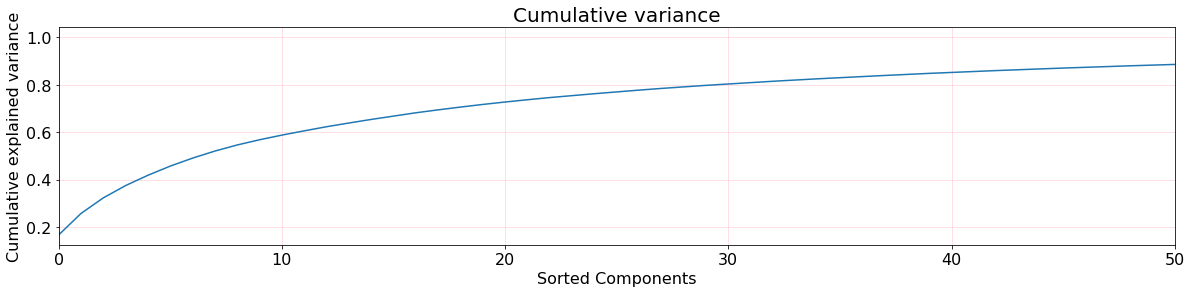

In [17]:
pca = PCA(n_components = 256)
pca.fit(train_2_7[:, 1:])

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Sorted Components', size=16)
ax.set_ylabel('Cumulative explained variance',size=16)
ax.set_xlim([0, 50])
ax.set_title('Cumulative variance', size=20)
ax.grid(color='pink', linestyle='-', linewidth=0.5)
ax.tick_params(labelsize=16)

In [18]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_), columns = ['Accuracy']).iloc[40:47,]

,Accuracy
40,0.851723
41,0.855690
42,0.859496
43,0.863186
44,0.866728
45,0.870098
46,0.873346


# Differentiate all digits 
- I project ziptrain onto two principal components
- I make a scatterplot to confirm wheather or not only two principal components separates all digits properly.
- I use linear discriminant on ziptrain over 256 original pixels and build the confusion matrix of this model over ziptrain
- I use linear disciminant over "m" projected principal components, with the appropriate choice of "m" (where the precision of prediction maximizes over ziptest data set).


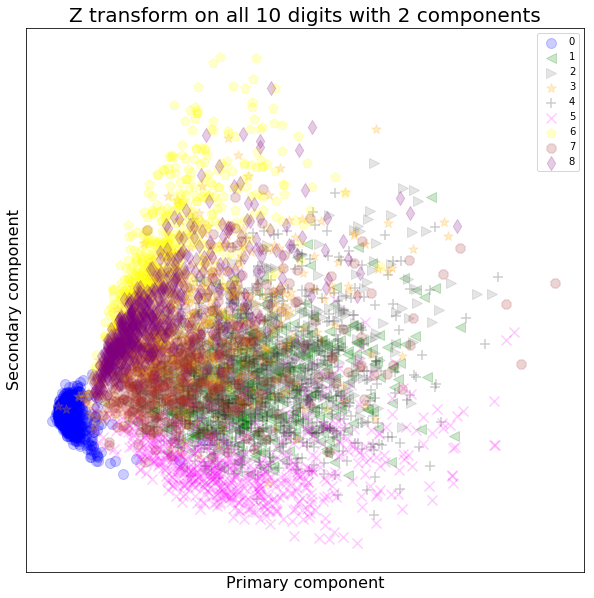

In [19]:
# Project ziptrain onto two principal components
# Make a scatterplot to confirm wheather or not only two principal components separates all digits properly.

pca = PCA(n_components = 2)
pca.fit(train[:, 1:])

markers = ['v', 'o', '<', '>', '*', '+', 'x', 'p', '8', 'd']
colors = ['red', 'blue', 'green', 'gray', 'orange', 'black', 'magenta', 'yellow', 'brown', 'purple']

Z_train = pca.transform(train[:,1:])
fig, ax = plt.subplots(figsize=(10, 10))
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
ax.set_xlabel('Primary component', size = 16)
ax.set_ylabel('Secondary component', size = 16)
ax.set_title('Z transform on all 10 digits with 2 components', size=20);


for i in range(1,10):
    ax.scatter(Z_train[:,0][train[:,0]==i], Z_train[:,1][train[:,0]==i], s = 100, \
           c=colors[i], marker = markers[i], alpha = 0.2);
ax.legend([0,1,2,3,4,5,6,7,8,9]);


<ul>
<li>By inspection, two components could potentially classify 10 digits since digits seem to be clustered at different areas</li>
<ul><li>See scree plot towards the end of the document</li></ul>
</ul>


------------------ LD on TRAIN data on digit: 0 -------------------
          Predicted 0  Predicted 1
Actual 0         6072           25
Actual 1           27         1167

------------------ LD on TRAIN data on digit: 1 -------------------
          Predicted 0  Predicted 1
Actual 0         6258           28
Actual 1            4         1001

------------------ LD on TRAIN data on digit: 2 -------------------
          Predicted 0  Predicted 1
Actual 0         6538           22
Actual 1           74          657

------------------ LD on TRAIN data on digit: 3 -------------------
          Predicted 0  Predicted 1
Actual 0         6566           67
Actual 1           40          618

------------------ LD on TRAIN data on digit: 4 -------------------
          Predicted 0  Predicted 1
Actual 0         6560           79
Actual 1           60          592

------------------ LD on TRAIN data on digit: 5 -------------------
          Predicted 0  Predicted 1
Actual 0         6703     

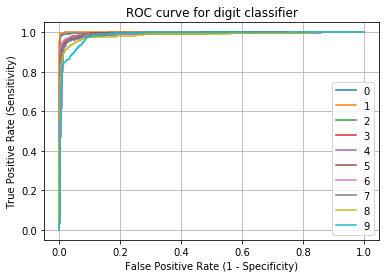

In [20]:
# I use linear discriminant on ziptrain over 256 original pixels (no PCA preprocessing)
# I build the confusion matrix of this model over ziptrain

ld = LinearDiscriminantAnalysis()
ld.fit(train[:, 1:], train[:, 0])
y_predict = ld.predict(train[:, 1:])

accuracy_raw = []

# binarization of digits for confusion matrix:
# - all y that equal to digit i are set to 1, else 0
# - all y_predict that equal to digit i are set to 1, else 0 
# - then accuracy is computed on the prediction of i only.
# - i is 0 to 9
for i in range(0,10):
    y = (train[:,0] == i).astype(int)
    y_pred = np.array(y_predict == i).astype(int) 
    y_prob = ld.predict_proba(train[:, 1:])[:,i]
    accuracy_raw.append(accuracy_metric(y, y_pred))
    print("\n------------------ LD on TRAIN data on digit: {} -------------------".format(i))
    print(classification_performance(y, y_pred, y_prob, False)); 
    
plt.legend(list(range(0,10)));
print('\nMean accuracy: ', np.array(accuracy_raw).mean())


<ul>
<li>The mean accuracy is high (about 99%), which is not a surprise given that accuracy is measured on the train data.</li>
<li>Interestingly, overall accuracy is also high on <u>test data</u> (about 98%), as shown below.</li>
<li>Digit 8 and 2 have the lowest sensitivity scores</li>
</ul>


------------------ LD on TEST data on digit: 0 -------------------
          Predicted 0  Predicted 1
Actual 0         1625           23
Actual 1           17          342

------------------ LD on TEST data on digit: 1 -------------------
          Predicted 0  Predicted 1
Actual 0         1736            7
Actual 1           13          251

------------------ LD on TEST data on digit: 2 -------------------
          Predicted 0  Predicted 1
Actual 0         1795           14
Actual 1           41          157

------------------ LD on TEST data on digit: 3 -------------------
          Predicted 0  Predicted 1
Actual 0         1802           39
Actual 1           24          142

------------------ LD on TEST data on digit: 4 -------------------
          Predicted 0  Predicted 1
Actual 0         1760           47
Actual 1           26          174

------------------ LD on TEST data on digit: 5 -------------------
          Predicted 0  Predicted 1
Actual 0         1828           

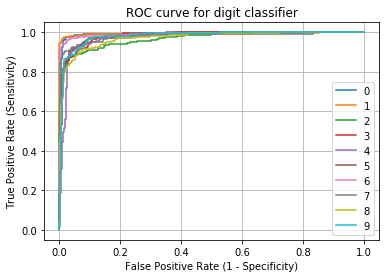

In [22]:
# I do the same thing as above, but on test data and get very good overall accuracy of 98.2%, 
# which suggests that the algorithm does not overfit

y_predict = ld.predict(test[:, 1:])

# Performance on test data
for i in range(0,10):
    y = (test[:,0] == i).astype(int)
    y_pred = np.array(y_predict == i).astype(int) 
    y_prob = ld.predict_proba(test[:, 1:])[:,i]
    accuracy_raw.append(accuracy_metric(y, y_pred))
    print("\n------------------ LD on TEST data on digit: {} -------------------"\
          .format(i))
    print(classification_performance(y, y_pred, y_prob, False));  
plt.legend(list(range(0,10)));
print('\nMean accuracy: ', np.array(accuracy_raw).mean())

Highest accuracy of 0.9771909428112716 with 156 component


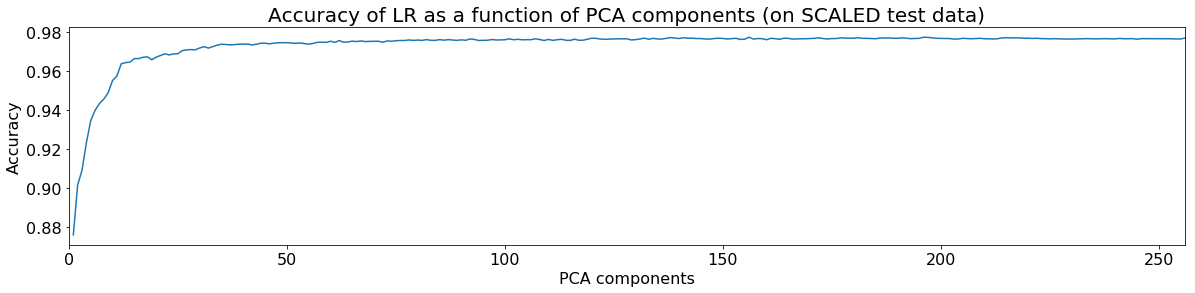

In [23]:
# I use linear disciminant over "m" projected principal components, 
# with the appropriate choice of "m" = 156
# The accuracy of test data is slighly lower this time (97.7%)

components = list(range(1, train[0,:].shape[0])) 
accuracy_m = []

for m in components:
    pca = PCA(n_components = m)
    pca.fit(train[:, 1:])
    Z_train = pca.transform(train[:,1:])
    ld.fit(Z_train, train[:, 0])
    Z_test = pca.transform(test[:,1:])
    temp_digit_accuracy = []
    
    # binarization of digits for confusion matrix: 
    for i in range(1,10):
        y = (test[:,0] == i).astype(int)
        y_pred = np.array(ld.predict(Z_test) == i).astype(int) 
        temp_digit_accuracy.append(accuracy_metric(y, y_pred))  
    accuracy_m.append(np.array(temp_digit_accuracy).mean(axis=0))  
    
plt.subplots(figsize=(20,4))
plt.plot(components, accuracy_m)
plt.title('Accuracy of LR as a function of PCA components (on SCALED test data)',size=20)
plt.xlabel('PCA components',size=16)
plt.ylabel('Accuracy',size=16)
plt.xlim(0,256)
plt.tick_params(labelsize=16)
print('Highest accuracy of {} with {} component'\
      .format(np.max(accuracy_m),np.where(accuracy_m == np.max(accuracy_m))[0][0]+1))

In [32]:
pd.DataFrame(accuracy_m, columns = ['Accuracy']).iloc[150:157]

,Accuracy
150,0.976305
151,0.976471
152,0.976637
153,0.976084
154,0.976194
155,0.977191
156,0.976250


<ul>
<li>The graph above suggests that best accuracy is obtained when m = 156, with 97.6% accuracy</li>
<li>In contrast, with only 10 components we get an accuracy of 95.5%</li>
<li>I printed the confusion matrices below when m=10 vs. when m = 156.</li>
<ul><li>The scree plot below suggests using only one component for an accuracy of 87.6%</li></ul>
</ul>


------------------ LD on TRAIN data on digit: 1 -------------------
          Predicted 0  Predicted 1
Actual 0         1718           25
Actual 1            9          255

------------------ LD on TRAIN data on digit: 2 -------------------
          Predicted 0  Predicted 1
Actual 0         1778           31
Actual 1           59          139

------------------ LD on TRAIN data on digit: 3 -------------------
          Predicted 0  Predicted 1
Actual 0         1800           41
Actual 1           60          106

------------------ LD on TRAIN data on digit: 4 -------------------
          Predicted 0  Predicted 1
Actual 0         1754           53
Actual 1           57          143

------------------ LD on TRAIN data on digit: 5 -------------------
          Predicted 0  Predicted 1
Actual 0         1810           37
Actual 1           46          114

------------------ LD on TRAIN data on digit: 6 -------------------
          Predicted 0  Predicted 1
Actual 0         1762     

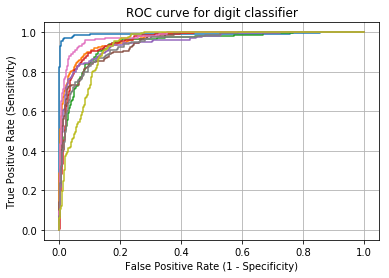

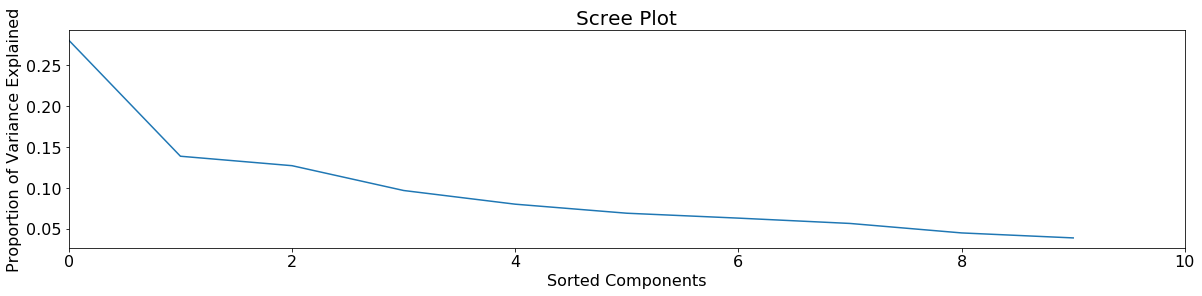

In [27]:
m = 10
pca = PCA(n_components = m)
pca.fit(train[:, 1:])
Z_train = pca.transform(train[:,1:])
ld.fit(Z_train, train[:, 0])

Z_test = pca.transform(test[:,1:])

accuracy = []
for i in range(1,10):
    y = (test[:,0] == i).astype(int)
    y_pred = np.array(ld.predict(Z_test) == i).astype(int) 
    y_prob = ld.predict_proba(Z_test)[:,i]
    print("\n------------------ LD on TRAIN data on digit: {} -------------------"\
          .format(i))
    accuracy.append(accuracy_metric(y, y_pred))
    print(classification_performance(y, y_pred, y_prob, False)); 
print('\nMean accuracy: ', np.array(accuracy).mean())

fig, ax = plt.subplots(figsize=(20, 4))
ax.plot(pca.explained_variance_/np.sum(pca.explained_variance_) )
ax.set_xlabel('Sorted Components', size=16)
ax.set_ylabel('Proportion of Variance Explained',size=16)
ax.set_xlim([0, 10])
ax.set_title('Scree Plot',size=20)
ax.tick_params(labelsize=16)


------------------ LD on TRAIN data on digit: 1 -------------------
          Predicted 0  Predicted 1
Actual 0         1736            7
Actual 1           13          251

------------------ LD on TRAIN data on digit: 2 -------------------
          Predicted 0  Predicted 1
Actual 0         1792           17
Actual 1           44          154

------------------ LD on TRAIN data on digit: 3 -------------------
          Predicted 0  Predicted 1
Actual 0         1801           40
Actual 1           24          142

------------------ LD on TRAIN data on digit: 4 -------------------
          Predicted 0  Predicted 1
Actual 0         1762           45
Actual 1           27          173

------------------ LD on TRAIN data on digit: 5 -------------------
          Predicted 0  Predicted 1
Actual 0         1829           18
Actual 1           34          126

------------------ LD on TRAIN data on digit: 6 -------------------
          Predicted 0  Predicted 1
Actual 0         1828     

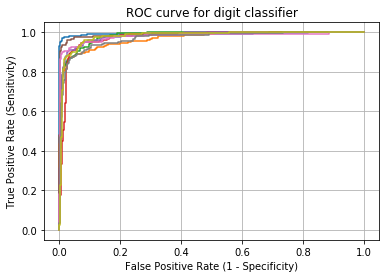

In [30]:
m = 156
pca = PCA(n_components = m)
pca.fit(train[:, 1:])
Z_train = pca.transform(train[:,1:])
ld.fit(Z_train, train[:, 0])

Z_test = pca.transform(test[:,1:])

accuracy = []
for i in range(1,10):
    y = (test[:,0] == i).astype(int)
    y_pred = np.array(ld.predict(Z_test) == i).astype(int) 
    y_prob = ld.predict_proba(Z_test)[:,i]
    print("\n------------------ LD on TRAIN data on digit: {} -------------------"\
          .format(i))
    accuracy.append(accuracy_metric(y, y_pred))
    print(classification_performance(y, y_pred, y_prob, False)); 
#plt.legend(list(range(0,10)));
print('\nMean accuracy: ', np.array(accuracy).mean())